In [1]:
import numpy as np
import pandas as pd
import missingno as mn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
train_df= pd.read_csv('train.csv')
train_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
train_df.shape

(7043, 21)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#provides summary statistics for numerical columns in the dataframe,
#it includes the count, mean, standard deviation, minimum and maximum values, and quartiles.
train_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
missing=train_df.isnull().sum()
missing


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
train_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<AxesSubplot:>

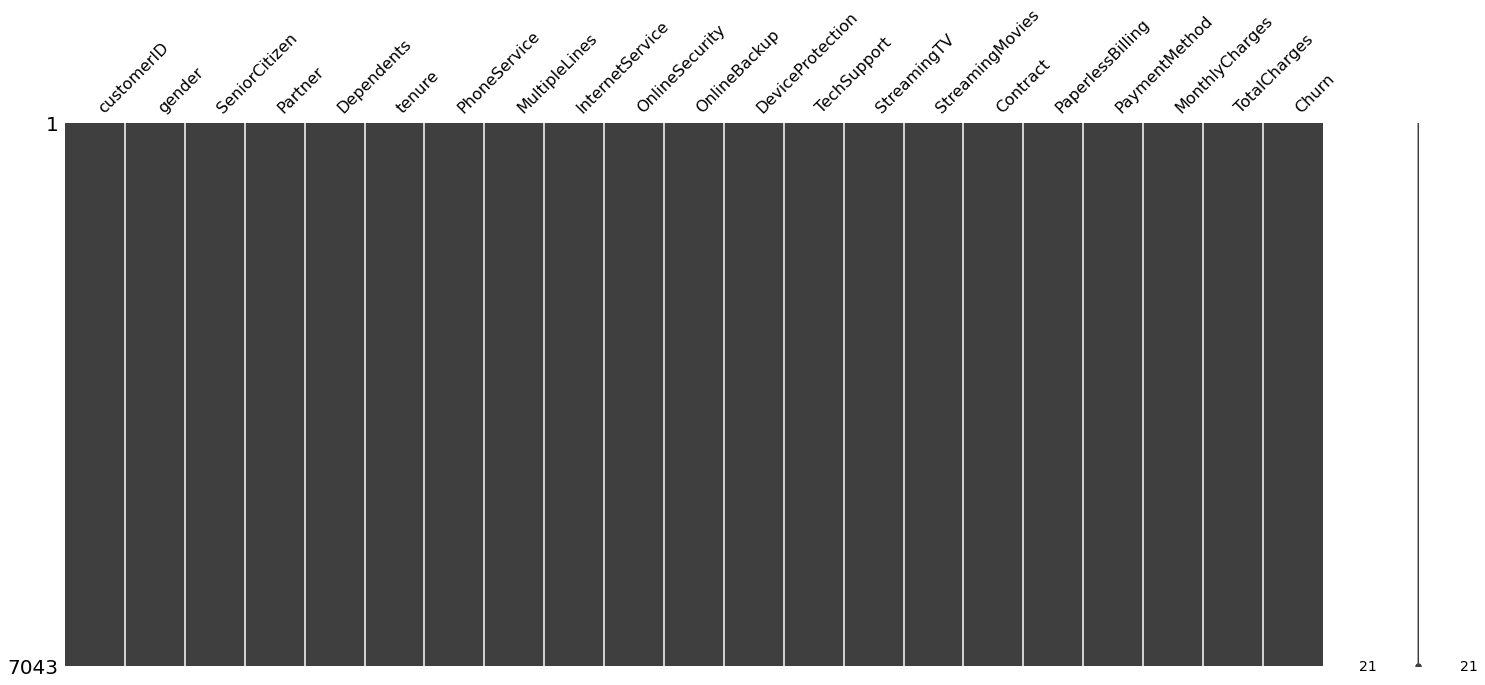

In [8]:
mn.matrix(train_df)

In [9]:
# Convert TotalCharges to a numeric data type
train_df["TotalCharges"] = pd.to_numeric(train_df["TotalCharges"], errors="coerce")

In [10]:
missing=train_df.isnull().sum()
missing

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# fill in missing values with the median value
median_value =train_df['TotalCharges'].median()
train_df['TotalCharges'].fillna(median_value, inplace=True)

In [12]:
missing=train_df.isnull().sum()
missing


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
train_df.drop('customerID', axis=1, inplace=True)


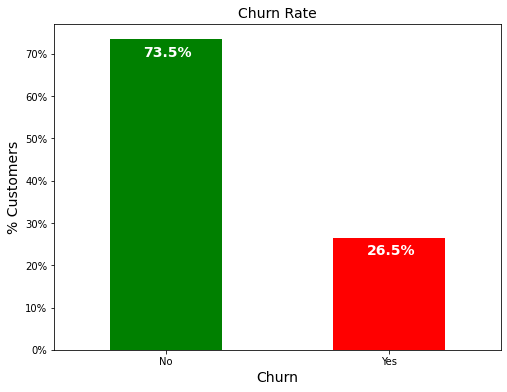

In [14]:
colors = ['green','red']
ax = (train_df['Churn'].value_counts()*100.0 /len(train_df)).plot(kind='bar',stacked = True,rot = 0,color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            color='white',
           weight = 'bold',
           size = 14)

In [15]:
# Load the training data
train_df = pd.read_csv('train.csv')


In [16]:

# Remove customer IDs from the data set
df2 = train_df.iloc[:, 1:]



In [17]:
# Convert the predictor variable to binary numeric variable
label_encoder = LabelEncoder()
df2['Churn'] = label_encoder.fit_transform(df2['Churn'])




In [18]:
# Convert all categorical variables into label-encoded variables
for column in df2.columns:
    if df2[column].dtype == object:
        df2[column] = label_encoder.fit_transform(df2[column])

# Separate features and target variable
X = df2.drop(columns=['Churn'])
y = df2['Churn']



In [19]:
# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print class distribution before and after resampling
print('Original class distribution:', y.value_counts())
print('Resampled class distribution:', y_resampled.value_counts())


Original class distribution: 0    5174
1    1869
Name: Churn, dtype: int64
Resampled class distribution: 0    5174
1    5174
Name: Churn, dtype: int64


In [20]:

# Scaling all the variables to a range of 0 to 1
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_resampled)
X_train = pd.DataFrame(scaler.transform(X_resampled))
X_train.columns = features



In [21]:
# Running logistic regression model
model = LogisticRegression()
result = model.fit(X_train, y_resampled)



In [22]:
# Load the test data
test_df = pd.read_csv('test.csv')



In [23]:
# Convert all categorical variables into label-encoded variables
for column in test_df.columns:
    if test_df[column].dtype == object:
        test_df[column] = label_encoder.fit_transform(test_df[column])

# Scaling all the variables to a range of 0 to 1
X_test = pd.DataFrame(scaler.transform(test_df))

# Make predictions on the test data using the trained model
y_pred = model.predict(X_test)

# Print the predicted values
print(y_pred)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_resampled, model.predict(X_train))
print('The accuracy of the model is:', accuracy*100)

[0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0]
The accuracy of the model is: 81.15577889447236


/Users/vignesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import warnings

# Define the hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 500, 1000]}

# Create a logistic regression model with lbfgs solver
model = LogisticRegression(solver='lbfgs', max_iter=10000)

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='f1_macro')

# Fit the grid search object to the data
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Use the best model to make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1 Score:', f1*100)


Best hyperparameters: {'C': 100, 'max_iter': 1000}
Accuracy: 81.59420289855073
Precision: 79.50530035335689
Recall: 85.79599618684462
F1 Score: 82.53094910591471


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

# Define the hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 500, 1000]}

# Create a logistic regression model with lbfgs solver
model = LogisticRegression(solver='lbfgs', max_iter=10000)

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)
# Fit the grid search object to the data
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    grid_search.fit(X_resampled, y_resampled)


# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Use the best model to make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1 Score:', f1*100)


Best hyperparameters: {'C': 1, 'max_iter': 500}
Accuracy: 81.83574879227054
Precision: 79.69991173874669
Recall: 86.08198284080076
F1 Score: 82.76810265811181


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import warnings

# Define the hyperparameters to tune
param_grid = {'max_depth': [1, 5, 10, None], 'min_samples_leaf': [1, 5, 10]}

# Create a decision tree model
model = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object to the data
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Use the best model to make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the predicted values
print(y_pred)

print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1 Score:', f1*100)



Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 10}
[1 0 0 ... 1 1 1]
Accuracy: 86.18357487922705
Precision: 85.09659613615456
Recall: 88.17921830314586
F1 Score: 86.61048689138576


In [28]:
import pickle

# Save the best model as a pickle file
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)


DecisionTreeClassifier()
